In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from collections import defaultdict

In [107]:
df = pd.read_csv("Real_Data.csv")
df

,Date,A1,A2,B1,B2,A_Score,B_Score
0,11-07-2025,NL,HS,KG,DS,21,16
1,11-07-2025,IG,KS,NL,HS,21,17
2,11-07-2025,IG,KS,KG,DS,21,10
3,11-07-2025,NL,HS,KG,DS,21,19
4,11-07-2025,NL,HS,IG,KS,21,19
...,...,...,...,...,...,...,...
67,30-07-2025,NL,MC,IG,HS,21,19
68,31-07-2025,KS,HS,NL,MC,21,13
69,31-07-2025,KS,HS,NL,MC,22,20
70,31-07-2025,NL,MC,KS,HS,21,18


In [108]:
player_stats = defaultdict(lambda: {"games": 0, "wins": 0, "losses": 0, "points_for": 0, "points_against": 0})
team_stats = defaultdict(lambda: {"games": 0, "wins": 0, "losses": 0, "point_diff": 0})

In [109]:
for _, row in df.iterrows():
    team_a = tuple(sorted([row["A1"], row["A2"]]))
    team_b = tuple(sorted([row["B1"], row["B2"]]))
    score_a, score_b = row["A_Score"], row["B_Score"]

    # Update individual player stats
    for player in [row["A1"], row["A2"], row["B1"], row["B2"]]:
        player_stats[player]["games"] += 1
    for player in [row["A1"], row["A2"]]:
        player_stats[player]["points_for"] += score_a
        player_stats[player]["points_against"] += score_b
        if score_a > score_b:
            player_stats[player]["wins"] += 1
        else:
            player_stats[player]["losses"] += 1
    for player in [row["B1"], row["B2"]]:
        player_stats[player]["points_for"] += score_b
        player_stats[player]["points_against"] += score_a
        if score_b > score_a:
            player_stats[player]["wins"] += 1
        else:
            player_stats[player]["losses"] += 1

    # Update team stats
    team_stats[team_a]["games"] += 1
    team_stats[team_b]["games"] += 1
    team_stats[team_a]["point_diff"] += score_a - score_b
    team_stats[team_b]["point_diff"] += score_b - score_a

    if score_a > score_b:
        team_stats[team_a]["wins"] += 1
        team_stats[team_b]["losses"] += 1
    else:
        team_stats[team_b]["wins"] += 1
        team_stats[team_a]["losses"] += 1

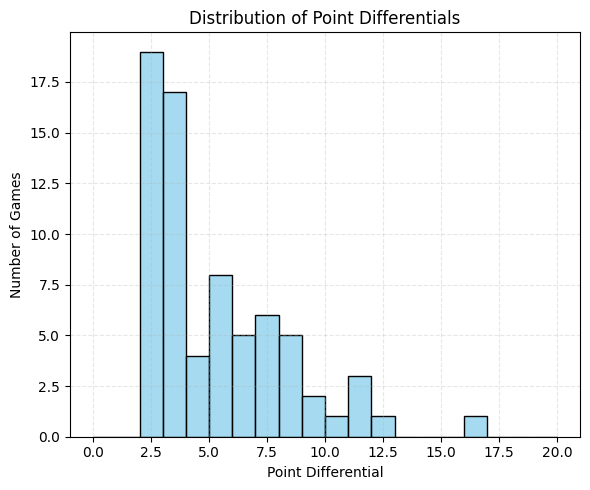

In [110]:
df["point_diff"] = df["A_Score"] - df["B_Score"]

# Histogram of all point differentials
plt.figure(figsize=(6, 5))
sns.histplot(df["point_diff"], bins=range(0, 21, 1), kde=False, color='skyblue', edgecolor='black')
plt.title("Distribution of Point Differentials")
plt.xlabel("Point Differential")
plt.ylabel("Number of Games")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

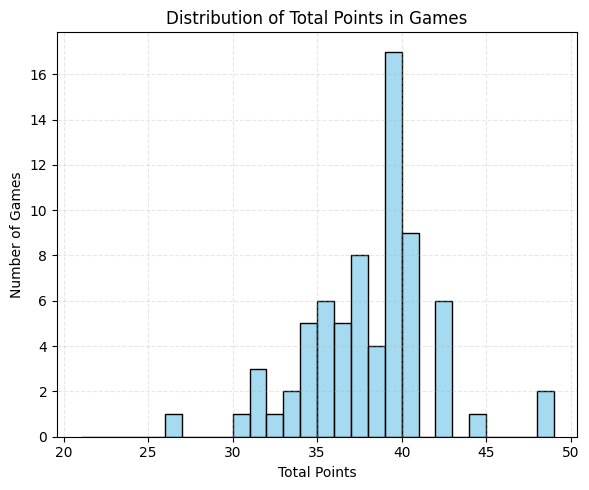

In [111]:
df["total_points"] = df["A_Score"] + df["B_Score"]

# Histogram of all point differentials
plt.figure(figsize=(6, 5))
sns.histplot(df["total_points"], bins=range(21, 50, 1), kde=False, color='skyblue', edgecolor='black')
plt.title("Distribution of Total Points in Games")
plt.xlabel("Total Points")
plt.ylabel("Number of Games")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [112]:
df_player_stats = pd.DataFrame.from_dict(player_stats, orient="index")
df_player_stats["win_pct"] = (df_player_stats["wins"] / df_player_stats["games"]).round(3)
df_player_stats["point_win_pct"] = (df_player_stats["points_for"] / (df_player_stats["points_for"] + df_player_stats["points_against"])).round(3)
df_player_stats["point_diff"] = df_player_stats["points_for"] - df_player_stats["points_against"]
df_player_stats["diff_per_gane"] = (df_player_stats["point_diff"] / df_player_stats["games"]).round(2)
df_player_stats = df_player_stats.sort_values("win_pct", ascending=False)
cols = df_player_stats.columns
df_player_stats["player"] = df_player_stats.index
new_cols = ["player"]
new_cols.extend(cols)
df_player_stats = df_player_stats[new_cols]

In [113]:
df_team_stats = pd.DataFrame([
    {"team": k, "games": v["games"], "wins": v["wins"], "losses": v["losses"],
     "win_pct": round(v["wins"] / v["games"], 3), "point_diff": v["point_diff"]}
    for k, v in team_stats.items()
])
df_team_stats["diff_per_game"] = (df_team_stats["point_diff"] / df_team_stats["games"]).round(2)
df_team_stats = df_team_stats.sort_values("win_pct", ascending=False)

In [114]:
df_player_stats

,player,games,wins,losses,points_for,points_against,win_pct,point_win_pct,point_diff,diff_per_gane
KS,KS,21,14,7,430,365,0.667,0.541,65,3.10
DS,DS,33,19,14,634,620,0.576,0.506,14,0.42
NL,NL,48,27,21,932,887,0.562,0.512,45,0.94
IG,IG,61,34,27,1172,1123,0.557,0.511,49,0.80
HS,HS,31,17,14,594,602,0.548,0.497,-8,-0.26
KG,KG,49,22,27,876,947,0.449,0.481,-71,-1.45
MC,MC,45,11,34,806,900,0.244,0.472,-94,-2.09


In [115]:
df_team_stats

,team,games,wins,losses,win_pct,point_diff,diff_per_game
15,"(DS, NL)",4,4,0,1.000,24,6.00
0,"(HS, NL)",7,6,1,0.857,15,2.14
2,"(IG, KS)",10,8,2,0.800,48,4.80
18,"(HS, KS)",4,3,1,0.750,14,3.50
5,"(IG, NL)",12,9,3,0.750,39,3.25
13,"(DS, IG)",6,4,2,0.667,11,1.83
10,"(IG, KG)",10,6,4,0.600,-8,-0.80
8,"(KG, KS)",5,3,2,0.600,10,2.00
1,"(DS, KG)",19,10,9,0.526,-16,-0.84
16,"(HS, MC)",2,1,1,0.500,0,0.00


In [116]:
df_player_stats.to_json('C:/Projects/TT ELO/assets/player_stats.json')
df_team_stats.to_json('C:/Projects/TT ELO/assets/team_stats.json')

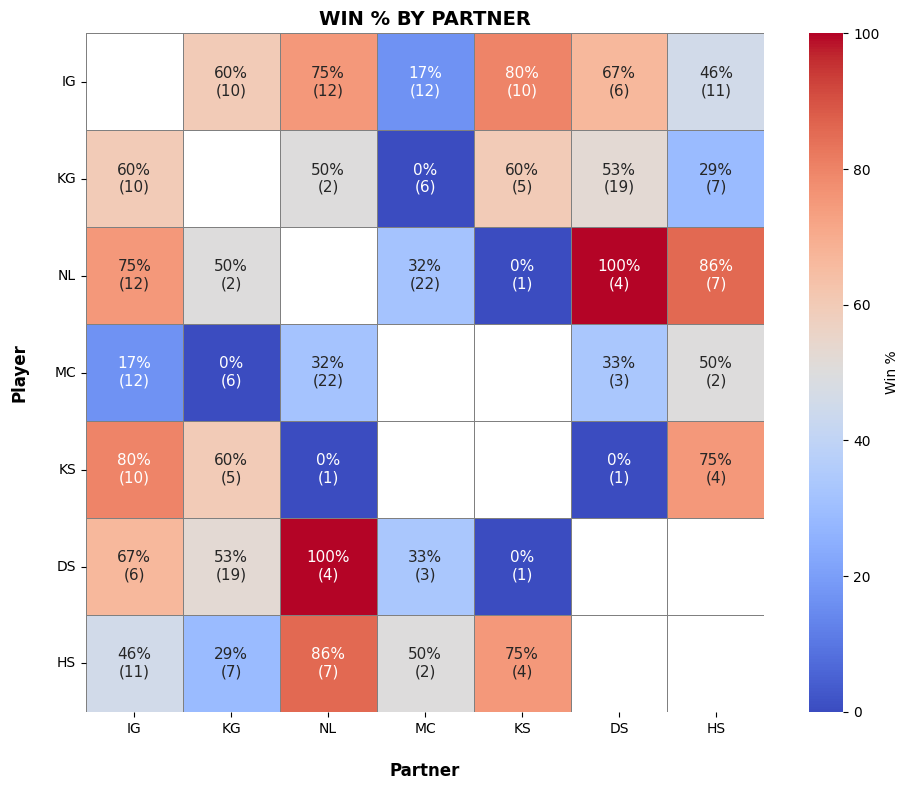

In [117]:
players = ['IG', 'KG', 'NL', 'MC', 'KS', 'DS', 'HS']
win_matrix = {p1: {p2: np.nan for p2 in players} for p1 in players}
games_matrix = {p1: {p2: 0 for p2 in players} for p1 in players}
annot_matrix = {p1: {p2: '' for p2 in players} for p1 in players}

# Fill values
for _, row in df_team_stats.iterrows():
    p1, p2 = row['team']
    win_pct = row['win_pct'] * 100
    games = row['games']
    
    # Symmetric assignment
    for a, b in [(p1, p2), (p2, p1)]:
        win_matrix[a][b] = win_pct
        games_matrix[a][b] = games
        annot_matrix[a][b] = f"{win_pct:.0f}%\n({games})"

# Create DataFrames
df_win = pd.DataFrame(win_matrix, index=players, columns=players)
df_annot = pd.DataFrame(annot_matrix, index=players, columns=players)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(df_win, annot=df_annot, fmt="", cmap="coolwarm", square=True,
            cbar_kws={'label': 'Win %'}, annot_kws={"size": 11}, linewidths=0.5, linecolor='gray')

plt.title("WIN % BY PARTNER", fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.ylabel('Player\n', fontsize=12, fontweight='bold')
plt.xlabel('\nPartner', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig("C:/Projects/TT ELO/assets/partner_heatmap.png", dpi=300)
plt.show()

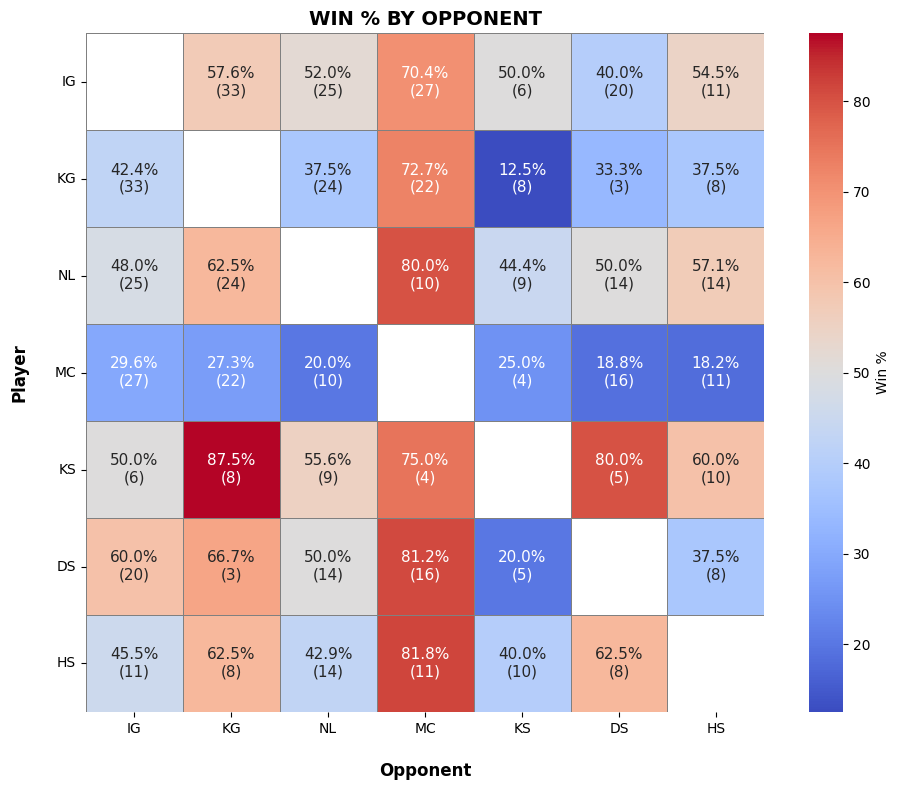

In [118]:
players = ['IG', 'KG', 'NL', 'MC', 'KS', 'DS', 'HS']
win_matrix = {p1: {p2: 0 for p2 in players} for p1 in players}
loss_matrix = {p1: {p2: 0 for p2 in players} for p1 in players}
annot_matrix = {p1: {p2: '' for p2 in players} for p1 in players}

# Fill values
for _, row in df.iterrows():
    team_a = tuple(sorted([row["A1"], row["A2"]]))
    team_b = tuple(sorted([row["B1"], row["B2"]]))
    score_a, score_b = row["A_Score"], row["B_Score"]
    for p_a in team_a:
        for p_b in team_b:
            win_matrix[p_a][p_b] += 1
            loss_matrix[p_b][p_a] += 1

data = []
annotations = []

for p1 in players:
    row = []
    ann_row = []
    for p2 in players:
        wins = win_matrix[p1][p2]
        losses = loss_matrix[p1][p2]
        total = wins + losses
        if total > 0:
            win_pct = wins / total * 100
            row.append(win_pct)
            ann_row.append(f"{win_pct:.1f}%\n({total})")
        else:
            row.append(None)
            ann_row.append("N/A")
    data.append(row)
    annotations.append(ann_row)

# Create DataFrames
df_by_opponent = pd.DataFrame(data, index=players, columns=players)
annot_df = pd.DataFrame(annotations, index=players, columns=players)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_by_opponent, annot=annot_df, fmt="", cmap="coolwarm", square=True,
            cbar_kws={'label': 'Win %'}, annot_kws={"size": 11}, linewidths=0.5, linecolor='gray')
plt.title('WIN % BY OPPONENT', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.ylabel('Player\n', fontsize=12, fontweight='bold')
plt.xlabel('\nOpponent', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig("C:/Projects/TT ELO/assets/opponent_heatmap.png", dpi=300)
plt.show()

In [119]:
player_win_loss_diff = []

for player in players:
    point_diffs_in_wins = []
    point_diffs_in_losses = []
    
    for _, row in df.iterrows():
        team_A = [row["A1"], row["A2"]]
        team_B = [row["B1"], row["B2"]]
        diff = row["A_Score"] - row["B_Score"]
        
        if player in team_A:
            if diff > 0:
                point_diffs_in_wins.append(diff)
            else:
                point_diffs_in_losses.append(diff)
        elif player in team_B:
            if diff < 0:
                point_diffs_in_wins.append(-diff)
            else:
                point_diffs_in_losses.append(-diff)
    
    avg_win_diff = np.mean(point_diffs_in_wins) if point_diffs_in_wins else 0
    avg_loss_diff = np.mean(point_diffs_in_losses) if point_diffs_in_losses else 0
    
    player_win_loss_diff.append({
        "player": player,
        "avg_diff_in_wins": round(avg_win_diff, 2),
        "avg_diff_in_losses": round(avg_loss_diff, 2)
    })

df_win_loss_diff = pd.DataFrame(player_win_loss_diff)
df_win_loss_diff["Variance"] = df_win_loss_diff["avg_diff_in_wins"] - df_win_loss_diff["avg_diff_in_losses"]
df_win_loss_diff = df_win_loss_diff.sort_values("avg_diff_in_wins", ascending=False)
df_win_loss_diff = df_win_loss_diff.reset_index(drop=True)
df_win_loss_diff

,player,avg_diff_in_wins,avg_diff_in_losses,Variance
0,KS,6.00,-2.71,8.71
1,MC,5.45,-4.53,9.98
2,NL,5.11,-4.43,9.54
3,IG,4.97,-4.44,9.41
4,DS,4.74,-5.43,10.17
5,KG,4.32,-6.15,10.47
6,HS,3.29,-4.57,7.86


In [120]:
df_win_loss_diff.to_json('C:/Projects/TT ELO/assets/point_diff_stats.json')